# JET
# House Prices Prediction using TensorFlow Decision Forests

## Import the library

In [12]:
#import tensorflow as tf
#import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

## Load the dataset


In [2]:
train_file_path = "project/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


The data is composed of 81 columns and 1460 entries. We can see all 81 dimensions of our dataset by printing out the first 3 entries using the following code:

In [3]:
dataset_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


* There are 79 feature columns. Using these features your model has to predict the house sale price indicated by the label column named `SalePrice`.

We will drop the `Id` column as it is not necessary for model training.

In [4]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


We can inspect the types of feature columns using the following code:

In [5]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## House Price Distribution

Now let us take a look at how the house prices are distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


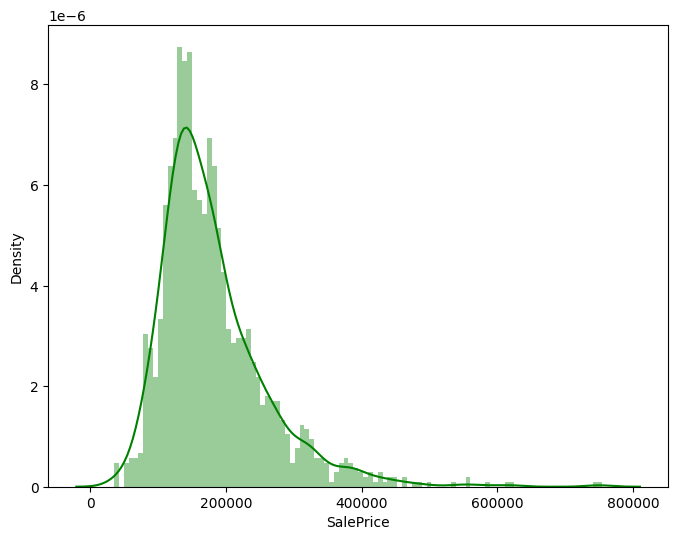

In [14]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Numerical data distribution

We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [15]:
list(set(dataset_df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [16]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Now let us plot the distribution for all the numerical features.

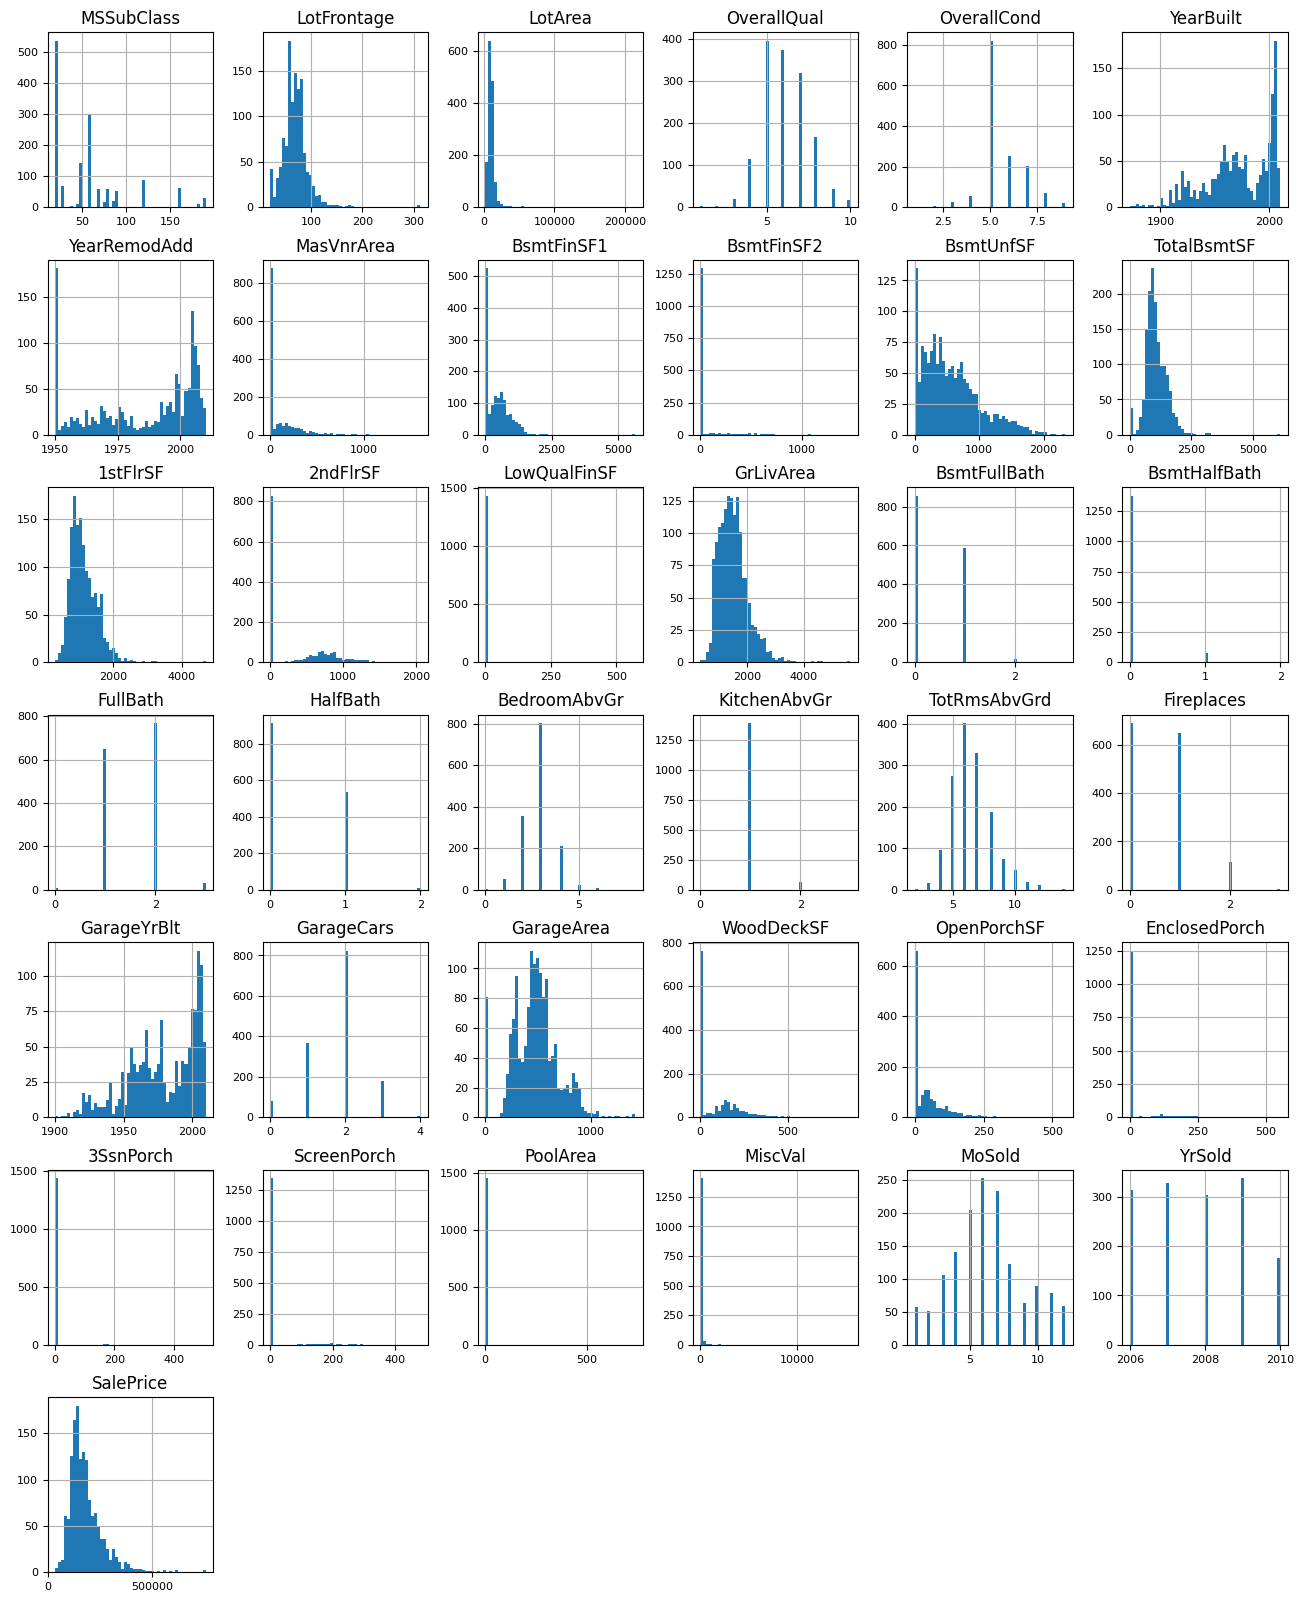

In [17]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

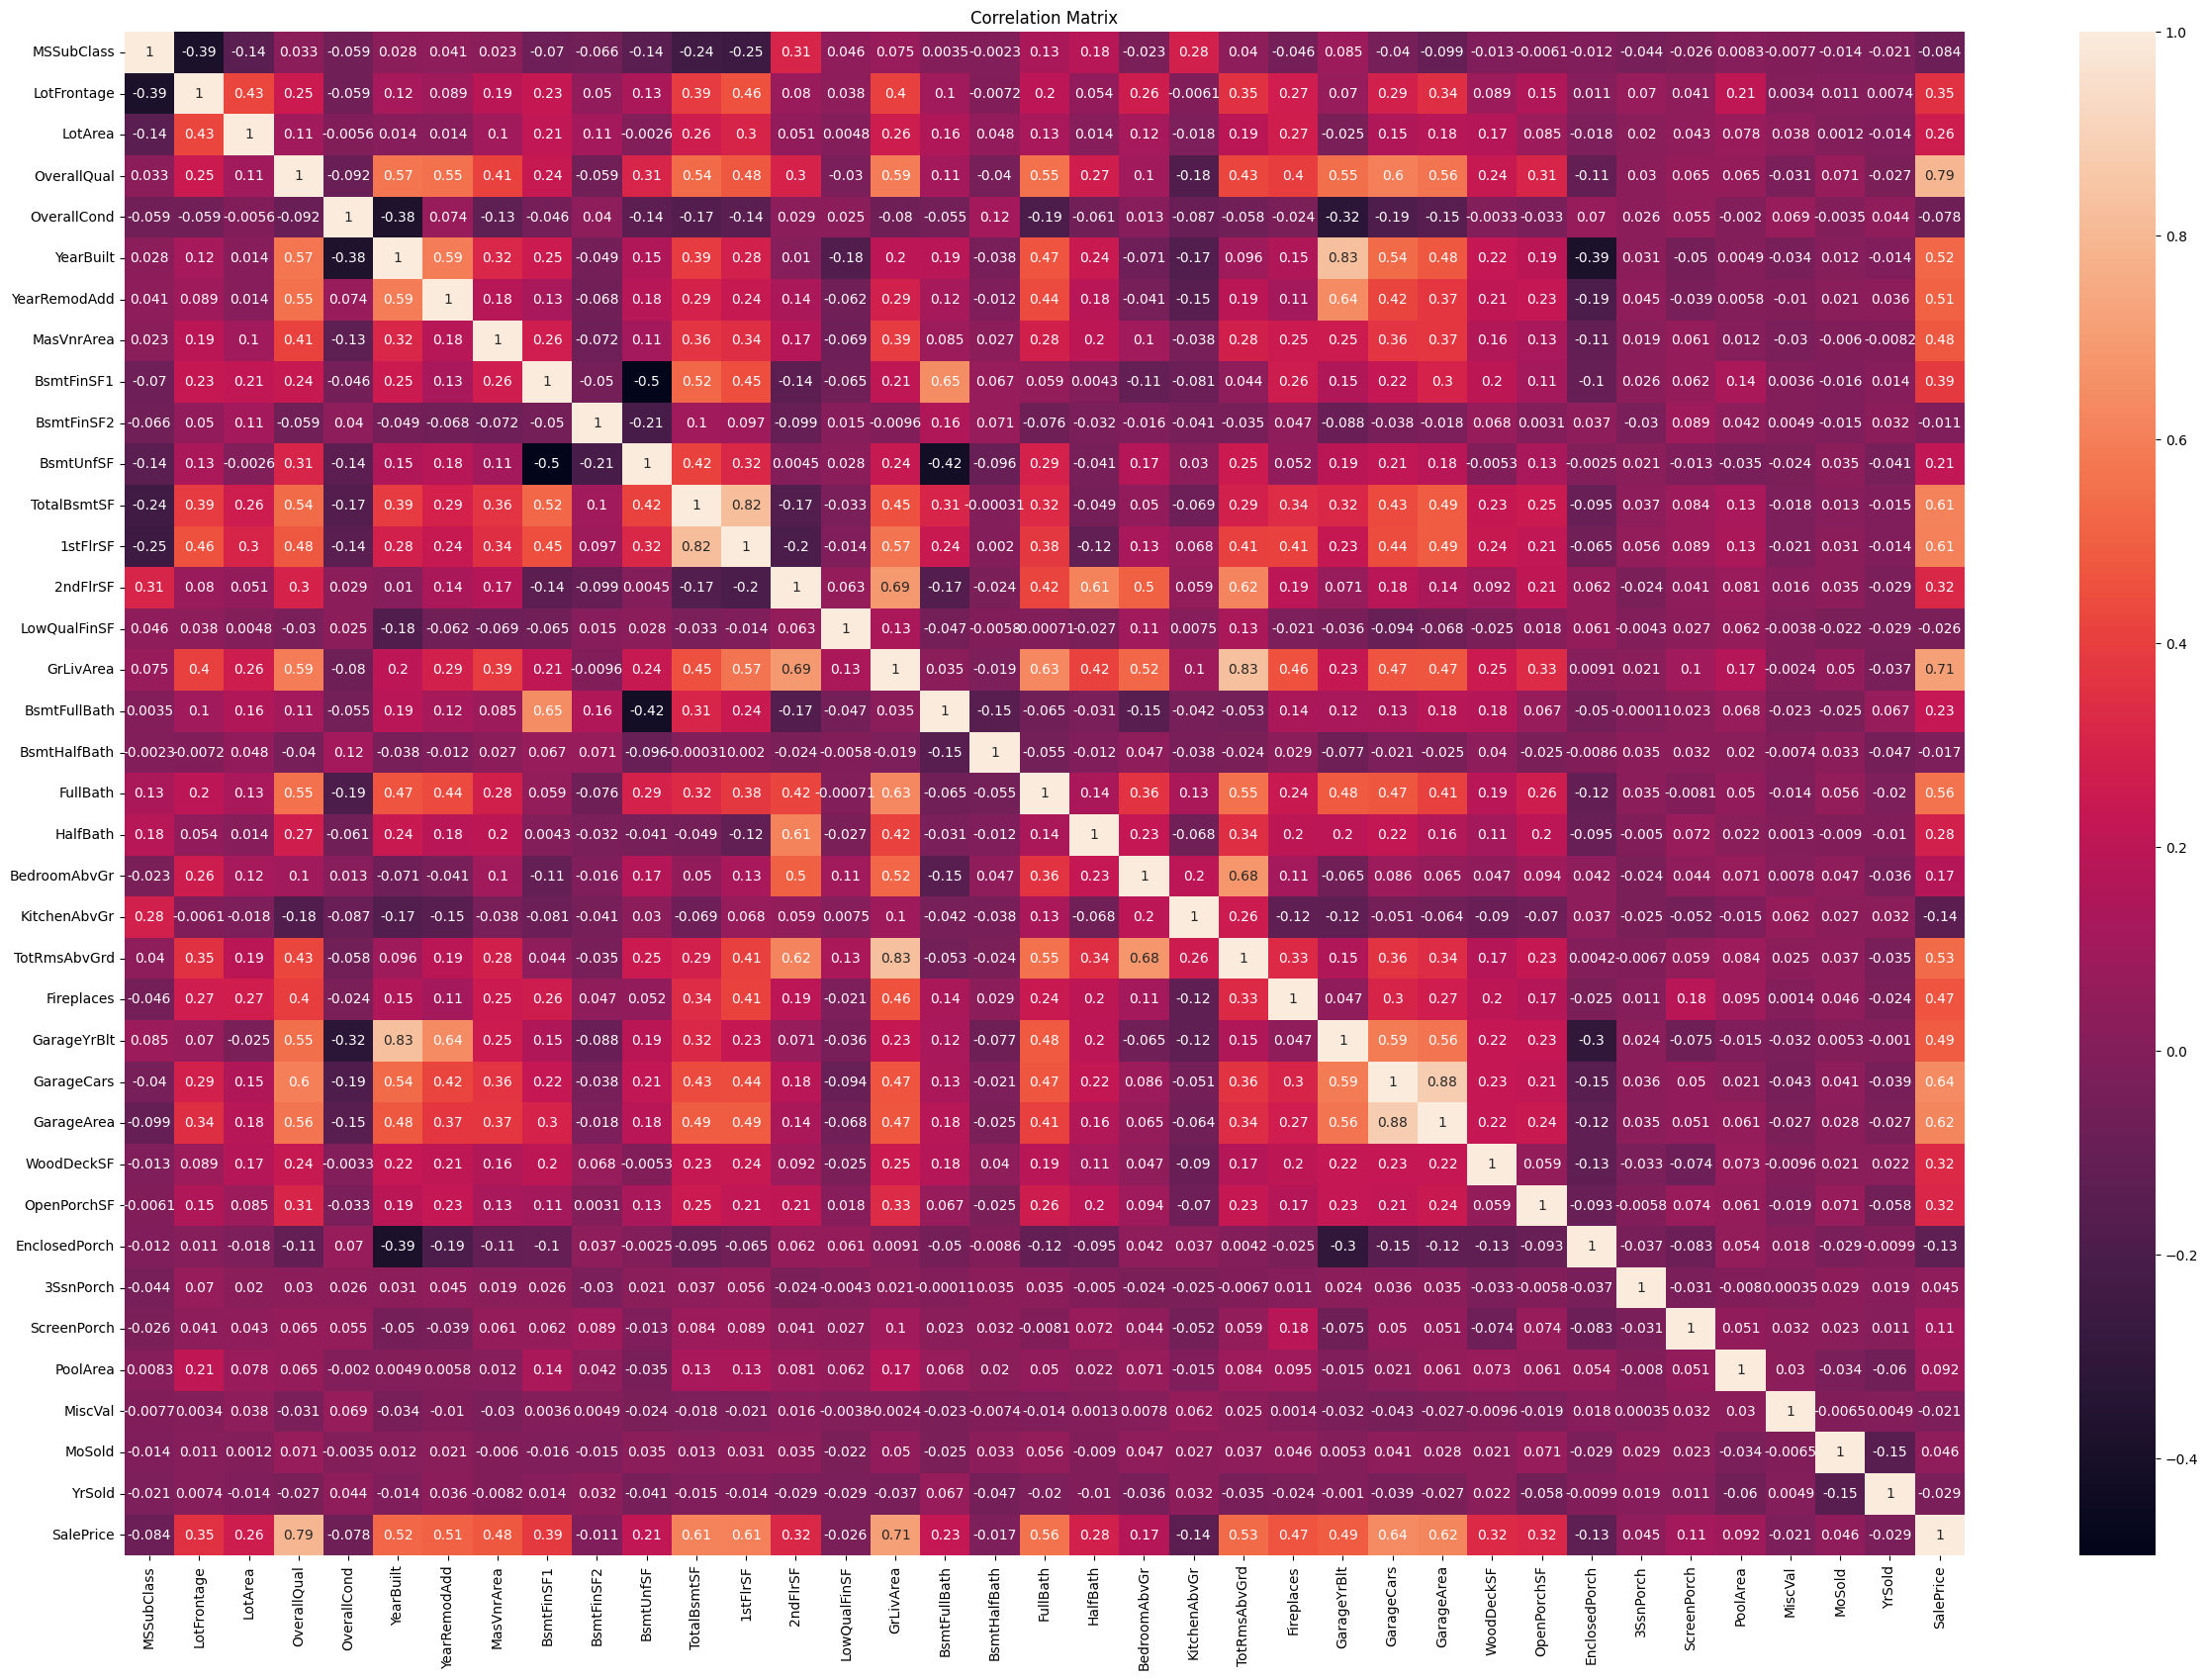

In [34]:
# Correlation Matrix in Numeric Columns
#correlation_matrix = dataset_df.corr(numeric_only=True)
correlation_matrix = df_num.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [36]:
abs(correlation_matrix.iloc[-1]).sort_values(ascending=False).head(5)



SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

We can see a list of most correlated features (out of the numeric features) with the sale price, that )gives us the first impression about their importance

In [70]:
nan_counts  = dataset_df.isna().sum().sort_values(ascending=False).head(20)/len(dataset_df)*100
print(f"features with the highest number of missing values in %")
print(f"{nan_counts}%")

features with the highest number of missing values in %
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
MSSubClass       0.000000
dtype: float64%


Features with nan_counts of more than 50% are not quality enough, and we would like to filter them out from the database

In [71]:
# Filter columns where the count of NaNs is greater than X%
nan_counts_threshold = 15
features_with_HighNA = nan_counts[nan_counts > nan_counts_threshold].index.tolist()
print(f"filter out list:{features_with_HighNA}")
dataset_df_DropHighNA = dataset_df.drop(columns=features_with_HighNA)
print(f" new shape after dropping features_with_HighNA {dataset_df_DropHighNA.shape}")

filter out list:['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage']
 new shape after dropping features_with_HighNA (1460, 73)


In [77]:
# Calculate the percentage of NaN values in each row
row_nan_counts = dataset_df_DropHighNA.isna().sum(axis=1) / len(dataset_df.columns) * 100
row_nan_counts = dataset_df_DropHighNA.isna().sum(axis=1) 

# Sort the percentages in descending order and select the top 30 (or however many you're interested in)
top_row_nan_counts = row_nan_counts.sort_values(ascending=False).head(50)

print("Rows with the highest percentage of missing values:")
print(top_row_nan_counts)

print(dataset_df_DropHighNA.iloc[1218])

Rows with the highest percentage of missing values:
1218    10
705     10
533     10
1011    10
39      10
1179    10
520     10
99       5
532      5
342      5
528      5
976      5
843      5
89       5
102      5
182      5
108      5
90       5
1030     5
88       5
614      5
1143     5
535      5
970      5
1035     5
464      5
826      5
1137     5
1283     5
1038     5
198      5
1216     5
1131     5
968      5
613      5
562      5
897      5
646      5
155      5
1321     5
635      5
1323     5
636      5
1325     5
148      5
1326     5
638      5
163      5
307      5
140      5
dtype: int64
MSSubClass           50
MSZoning             RM
LotArea            6240
Street             Pave
LotShape            Reg
                  ...  
MoSold                7
YrSold             2006
SaleType             WD
SaleCondition    Normal
SalePrice         80500
Name: 1218, Length: 73, dtype: object


It seems that missing values come in groups; for example, when the garage does not exist, then all related features have missing values. It would be relatively easy to impute those values with default relevant values in the imputation part

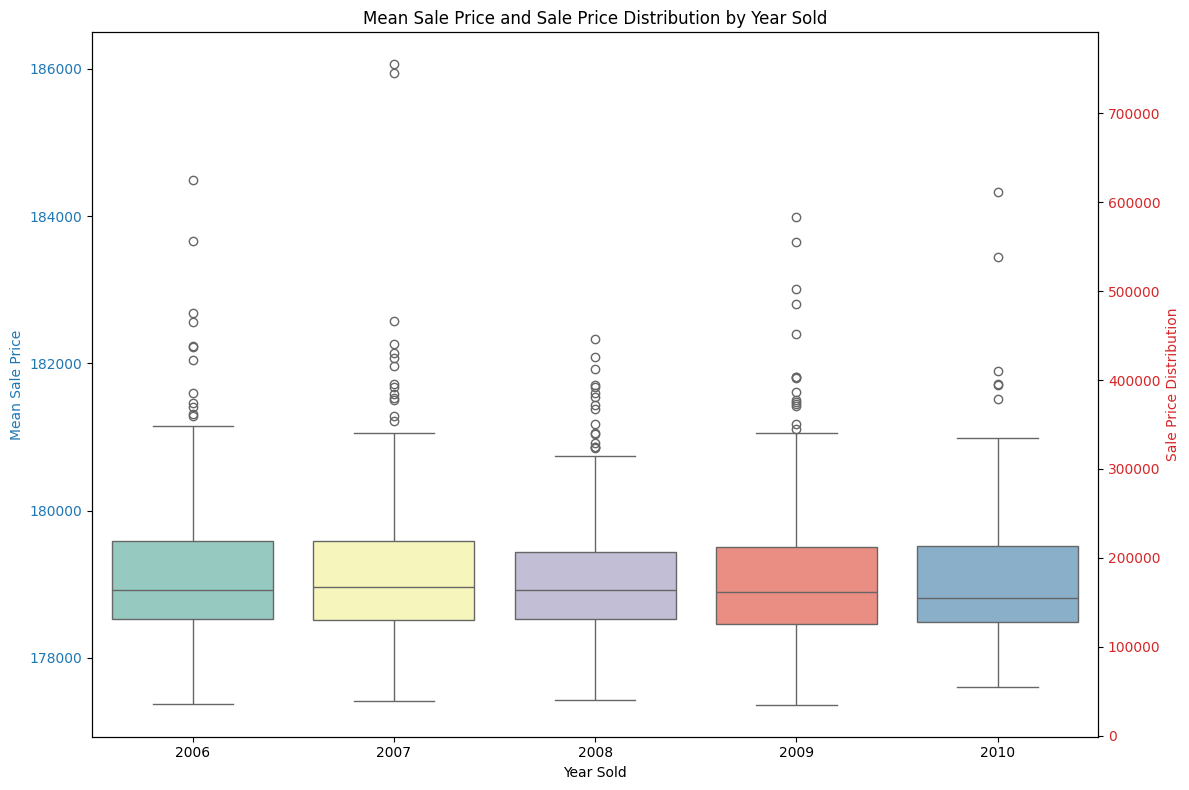

In [64]:

# Assuming 'dataset_df_DropHighNA' is your DataFrame
# Calculate the mean 'SalePrice' for each 'YrSold'
mean_sale_price_per_year = dataset_df_DropHighNA.groupby('YrSold')['SalePrice'].mean().reset_index()

# Setting up a figure with two subplots (ax1 and ax2) sharing the same x-axis (YrSold)
fig, ax1 = plt.subplots(figsize=(12, 8))

# Line plot for mean SalePrice over YrSold
color = 'tab:blue'
ax1.set_xlabel('Year Sold')
ax1.set_ylabel('Mean Sale Price', color=color)
ax1.plot(mean_sale_price_per_year['YrSold'], mean_sale_price_per_year['SalePrice'], color=color, marker='o', label='Mean Sale Price')
ax1.tick_params(axis='y', labelcolor=color)
# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
# Boxplot for SalePrice distribution per YrSold
color = 'tab:red'
ax2.set_ylabel('Sale Price Distribution', color=color)  # we already handled the x-label with ax1
sns.boxplot(x='YrSold', y='SalePrice', data=dataset_df_DropHighNA, ax=ax2, palette="Set3")
ax2.tick_params(axis='y', labelcolor=color)

# Adding a title
plt.title('Mean Sale Price and Sale Price Distribution by Year Sold')

fig.tight_layout()  # To adjust subplot params to give some padding
plt.show()

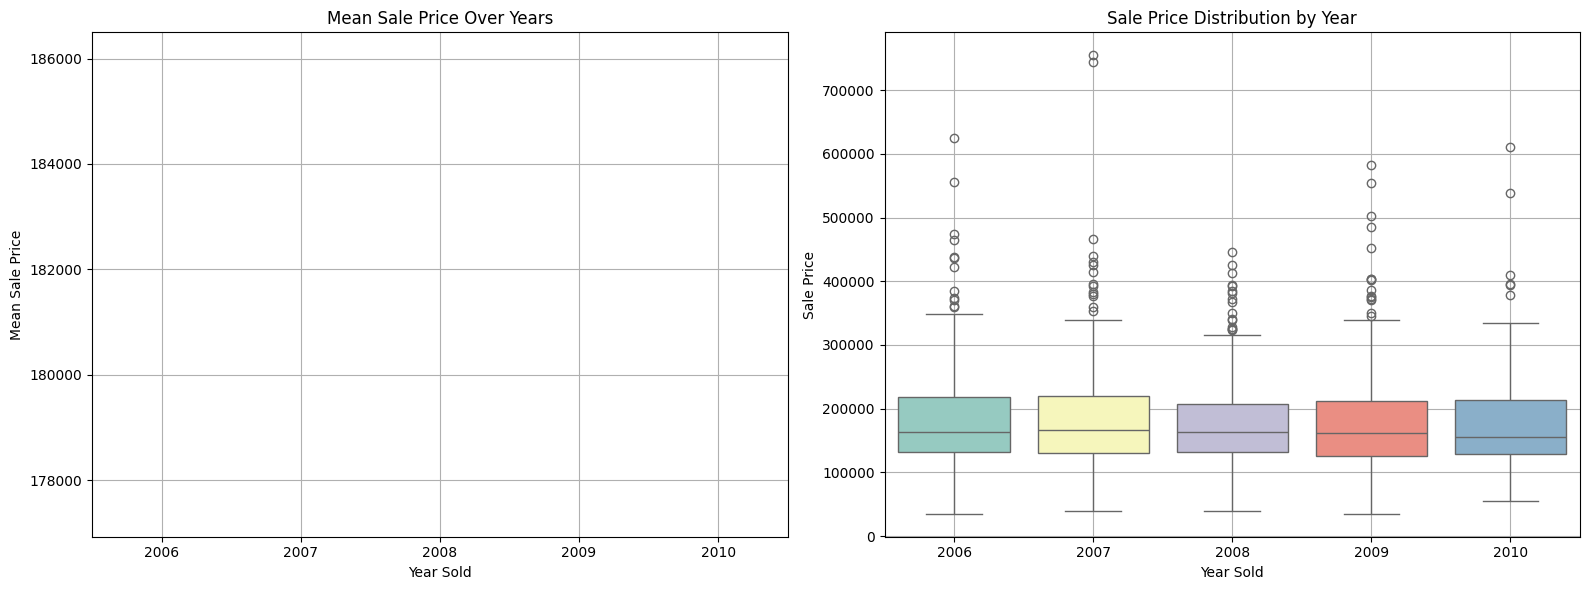

In [82]:
# Assuming 'dataset_df_DropHighNA' is your DataFrame
# Calculate the mean 'SalePrice' for each 'YrSold'
mean_sale_price_per_year = dataset_df_DropHighNA.groupby('YrSold')['SalePrice'].mean().reset_index()

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=True)

# Line plot on the first subplot
axs[0].plot(mean_sale_price_per_year['YrSold'], mean_sale_price_per_year['SalePrice'], marker='o', linestyle='-')
axs[0].set_title('Mean Sale Price Over Years')
axs[0].set_xlabel('Year Sold')
axs[0].set_ylabel('Mean Sale Price')
axs[0].grid(True)

# Boxplot on the second subplot
sns.boxplot(x='YrSold', y='SalePrice', data=dataset_df_DropHighNA, ax=axs[1], palette="Set3")
axs[1].set_title('Sale Price Distribution by Year')
axs[1].set_xlabel('Year Sold')
axs[1].set_ylabel('Sale Price')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

plt.show()

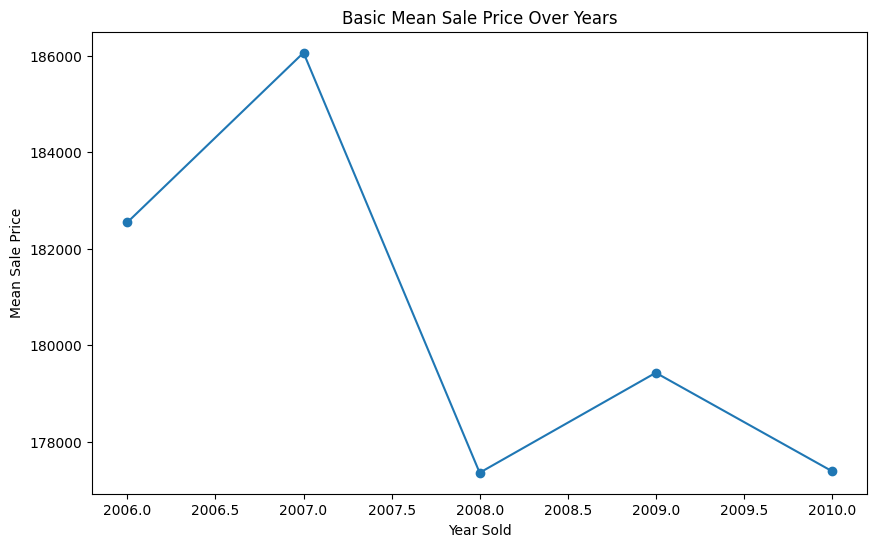

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(mean_sale_price_per_year['YrSold'], mean_sale_price_per_year['SalePrice'], marker='o', linestyle='-')
plt.title('Basic Mean Sale Price Over Years')
plt.xlabel('Year Sold')
plt.ylabel('Mean Sale Price')
plt.show()

In [83]:
# Assuming 'dataset_df' is your DataFrame
y = dataset_df['SalePrice']
X = dataset_df.drop('SalePrice', axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# You can now use decision_tree.predict(X_test) to make predictions


ValueError: could not convert string to float: 'RL'

## Prepare the dataset

This dataset contains a mix of numeric, categorical and missing features. TF-DF supports all these feature types natively, and no preprocessing is required. This is one advantage of tree-based models, making them a great entry point to Tensorflow and ML.

Now let us split the dataset into training and testing datasets:

In [20]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

995 examples in training, 465 examples in testing.


There's one more step required before we can train the model. We need to convert the datatset from Pandas format (`pd.DataFrame`) into TensorFlow Datasets format (`tf.data.Dataset`).

[TensorFlow Datasets](https://www.tensorflow.org/datasets/overview) is a high performance data loading library which is helpful when training neural networks with accelerators like GPUs and TPUs.

By default the Random Forest Model is configured to train classification tasks. Since this is a regression problem, we will specify the type of the task (`tfdf.keras.Task.REGRESSION`) as a parameter here.

## Select a Model

There are several tree-based models for you to choose from.

* RandomForestModel
* GradientBoostedTreesModel
* CartModel
* DistributedGradientBoostedTreesModel

To start, we'll work with a Random Forest. This is the most well-known of the Decision Forest training algorithms.

A Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement). The algorithm is unique in that it is robust to overfitting, and easy to use.

We can list the all the available models in TensorFlow Decision Forests using the following code:

## Create a Random Forest

Today, we will use the defaults to create the Random Forest Model while specifiyng the task type as `tfdf.keras.Task.REGRESSION`.